In [1]:
#Basic Libraries
import numpy as np
import pandas as pd

#Importing warnings
import warnings
warnings.filterwarnings('ignore')

#Data Visualization libraries
import seaborn as sns
import matplotlib.pyplot as plt

#Data Pre-Processing
from sklearn.preprocessing import LabelEncoder
from sklearn.impute import SimpleImputer
from sklearn.preprocessing import StandardScaler

# ML Algorithms
from sklearn.linear_model import LogisticRegression
from sklearn.naive_bayes import GaussianNB
from sklearn.neighbors import KNeighborsClassifier
from sklearn.svm import SVC
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.ensemble import GradientBoostingClassifier
from sklearn.ensemble import ExtraTreesClassifier
from sklearn.ensemble import AdaBoostClassifier
from sklearn.ensemble import BaggingClassifier
from sklearn.metrics import accuracy_score,classification_report,confusion_matrix,roc_auc_score,roc_curve,auc

#Model Export
import joblib
from joblib import dump #from joblib import load > to load .pkl file

In [2]:
#Fetching feature description from excel file 
desc = pd.read_excel('Data_Description.xlsx',sheet_name = 'Description')
desc = pd.DataFrame(desc,columns = ['Variable', 'Definition'])
desc.set_index(['Variable','Definition'])

,
Variable,Definition
label,"Flag indicating whether the user paid back the credit amount within 5 days of issuing the loan{1:success, 0:failure}"
msisdn,mobile number of user
aon,age on cellular network in days
daily_decr30,"Daily amount spent from main account, averaged over last 30 days (in Indonesian Rupiah)"
daily_decr90,"Daily amount spent from main account, averaged over last 90 days (in Indonesian Rupiah)"
rental30,Average main account balance over last 30 days
rental90,Average main account balance over last 90 days
last_rech_date_ma,Number of days till last recharge of main account
last_rech_date_da,Number of days till last recharge of data account


In [3]:
#loading dataset
df = pd.read_csv('Data file.csv')
df.head()

,Unnamed: 0,label,msisdn,aon,daily_decr30,daily_decr90,rental30,rental90,last_rech_date_ma,last_rech_date_da,...,maxamnt_loans30,medianamnt_loans30,cnt_loans90,amnt_loans90,maxamnt_loans90,medianamnt_loans90,payback30,payback90,pcircle,pdate
0,1,0,21408I70789,272.0,3055.050000,3065.150000,220.13,260.13,2.0,0.0,...,6.0,0.0,2.0,12,6,0.0,29.000000,29.000000,UPW,2016-07-20
1,2,1,76462I70374,712.0,12122.000000,12124.750000,3691.26,3691.26,20.0,0.0,...,12.0,0.0,1.0,12,12,0.0,0.000000,0.000000,UPW,2016-08-10
2,3,1,17943I70372,535.0,1398.000000,1398.000000,900.13,900.13,3.0,0.0,...,6.0,0.0,1.0,6,6,0.0,0.000000,0.000000,UPW,2016-08-19
3,4,1,55773I70781,241.0,21.228000,21.228000,159.42,159.42,41.0,0.0,...,6.0,0.0,2.0,12,6,0.0,0.000000,0.000000,UPW,2016-06-06
4,5,1,03813I82730,947.0,150.619333,150.619333,1098.90,1098.90,4.0,0.0,...,6.0,0.0,7.0,42,6,0.0,2.333333,2.333333,UPW,2016-06-22


In [4]:
df.tail()

,Unnamed: 0,label,msisdn,aon,daily_decr30,daily_decr90,rental30,rental90,last_rech_date_ma,last_rech_date_da,...,maxamnt_loans30,medianamnt_loans30,cnt_loans90,amnt_loans90,maxamnt_loans90,medianamnt_loans90,payback30,payback90,pcircle,pdate
209588,209589,1,22758I85348,404.0,151.872333,151.872333,1089.19,1089.19,1.0,0.0,...,6.0,0.0,2.0,12,6,0.0,1.0,1.000000,UPW,2016-06-17
209589,209590,1,95583I84455,1075.0,36.936000,36.936000,1728.36,1728.36,4.0,0.0,...,6.0,0.0,3.0,18,6,0.0,1.0,1.000000,UPW,2016-06-12
209590,209591,1,28556I85350,1013.0,11843.111667,11904.350000,5861.83,8893.20,3.0,0.0,...,12.0,0.0,6.0,54,12,0.0,4.0,3.833333,UPW,2016-07-29
209591,209592,1,59712I82733,1732.0,12488.228333,12574.370000,411.83,984.58,2.0,38.0,...,12.0,0.0,3.0,24,12,0.0,0.0,10.500000,UPW,2016-07-25
209592,209593,1,65061I85339,1581.0,4489.362000,4534.820000,483.92,631.20,13.0,0.0,...,12.0,0.0,2.0,18,12,0.0,0.0,0.000000,UPW,2016-07-07


In [5]:
#Checking shape of dataset
df.shape

(209593, 37)

##### Observation: 
        In dataset we have 209593 rows and 37 features.

In [6]:
#Checking for information 
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 209593 entries, 0 to 209592
Data columns (total 37 columns):
 #   Column                Non-Null Count   Dtype  
---  ------                --------------   -----  
 0   Unnamed: 0            209593 non-null  int64  
 1   label                 209593 non-null  int64  
 2   msisdn                209593 non-null  object 
 3   aon                   209593 non-null  float64
 4   daily_decr30          209593 non-null  float64
 5   daily_decr90          209593 non-null  float64
 6   rental30              209593 non-null  float64
 7   rental90              209593 non-null  float64
 8   last_rech_date_ma     209593 non-null  float64
 9   last_rech_date_da     209593 non-null  float64
 10  last_rech_amt_ma      209593 non-null  int64  
 11  cnt_ma_rech30         209593 non-null  int64  
 12  fr_ma_rech30          209593 non-null  float64
 13  sumamnt_ma_rech30     209593 non-null  float64
 14  medianamnt_ma_rech30  209593 non-null  float64
 15  

##### Observation :
         1.We have 3 columns which are in object datatype rest all are in float and int datatype.

In [7]:
for i in df.columns:
    print("Unique values in", i ,":", df[i].nunique())

Unique values in Unnamed: 0 : 209593
Unique values in label : 2
Unique values in msisdn : 186243
Unique values in aon : 4507
Unique values in daily_decr30 : 147026
Unique values in daily_decr90 : 158670
Unique values in rental30 : 132148
Unique values in rental90 : 141033
Unique values in last_rech_date_ma : 1186
Unique values in last_rech_date_da : 1174
Unique values in last_rech_amt_ma : 70
Unique values in cnt_ma_rech30 : 71
Unique values in fr_ma_rech30 : 1083
Unique values in sumamnt_ma_rech30 : 15141
Unique values in medianamnt_ma_rech30 : 510
Unique values in medianmarechprebal30 : 30428
Unique values in cnt_ma_rech90 : 110
Unique values in fr_ma_rech90 : 89
Unique values in sumamnt_ma_rech90 : 31771
Unique values in medianamnt_ma_rech90 : 608
Unique values in medianmarechprebal90 : 29785
Unique values in cnt_da_rech30 : 1066
Unique values in fr_da_rech30 : 1072
Unique values in cnt_da_rech90 : 27
Unique values in fr_da_rech90 : 46
Unique values in cnt_loans30 : 40
Unique values

In [8]:
#Dropping Unnamed column because it is of no use.
df=df.drop(columns=['Unnamed: 0'],axis=1)

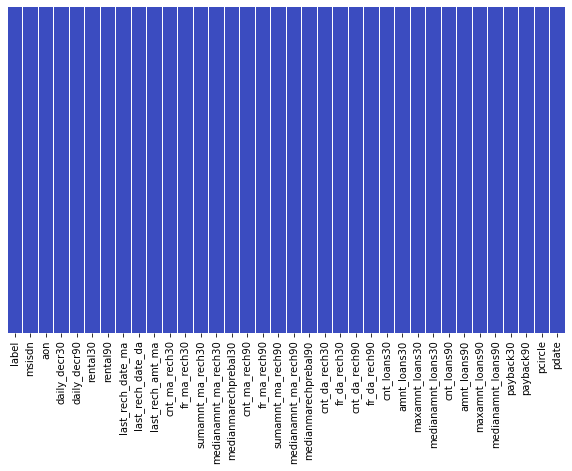

In [9]:
#Checking null vales using visualisation for better understanding 
plt.figure(figsize=(10,6))
sns.heatmap(df.isnull(),yticklabels=False,cbar=False,cmap='coolwarm')
plt.show()

##### Observation:
        1. From above visualisation we can clearly see that there are no missing values present in our dataset.

In [10]:
#Frequency of object features
for col in df.columns:
    if df[col].dtype=="object":
        print(df[col].value_counts())
        print()

04581I85330    7
47819I90840    7
29191I82738    6
67324I84453    6
60744I91197    6
              ..
99333I90581    1
00018I80570    1
50723I90845    1
91796I89235    1
32044I90842    1
Name: msisdn, Length: 186243, dtype: int64

UPW    209593
Name: pcircle, dtype: int64

2016-07-04    3150
2016-07-05    3127
2016-07-07    3116
2016-06-20    3099
2016-06-17    3082
              ... 
2016-06-04    1559
2016-08-18    1407
2016-08-19    1132
2016-08-20     788
2016-08-21     324
Name: pdate, Length: 82, dtype: int64



In [11]:
#Dropping pdate and pcircle features as it is not affecting the outcome feature 'label'.
df.drop(columns=['pdate','pcircle','msisdn'],axis=1, inplace = True)

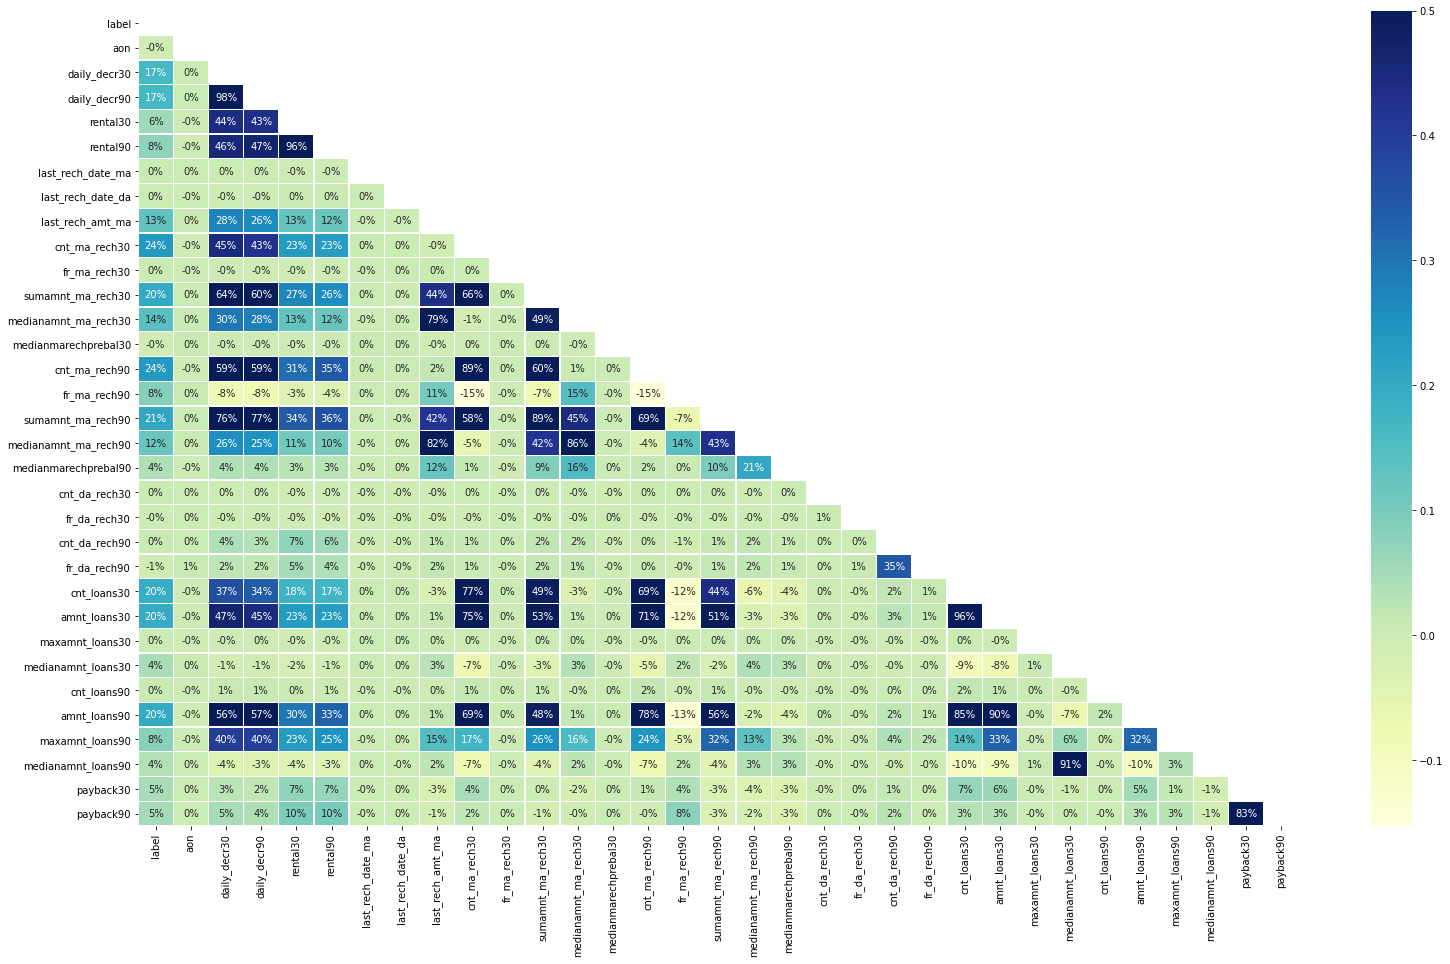

In [12]:
#Checking correlation using visualisation(Heatmap
df_corr=df.corr()
mask = np.zeros_like(df_corr)
mask[np.triu_indices_from(mask)] = True
plt.figure(figsize=(26,15))
sns.heatmap(df_corr,vmax=.5,mask=mask,annot=True,linewidths=.3,fmt='.0%', cmap="YlGnBu")

##### Observation:
        
        1.Here,many features like daily_decr30 with daily_decr90, rental30 with rental90, cnt_loans30 with amount_loans30, amount_loans30 with amount_loans90, medianamnt_loans30 with medianamnt_loans90 and payback30 with payback90 are highly positively correlated with each other. 

### Statistical Summary

In [13]:
df.describe()

,label,aon,daily_decr30,daily_decr90,rental30,rental90,last_rech_date_ma,last_rech_date_da,last_rech_amt_ma,cnt_ma_rech30,...,cnt_loans30,amnt_loans30,maxamnt_loans30,medianamnt_loans30,cnt_loans90,amnt_loans90,maxamnt_loans90,medianamnt_loans90,payback30,payback90
count,209593.000000,209593.000000,209593.000000,209593.000000,209593.000000,209593.000000,209593.000000,209593.000000,209593.000000,209593.000000,...,209593.000000,209593.000000,209593.000000,209593.000000,209593.000000,209593.000000,209593.000000,209593.000000,209593.000000,209593.000000
mean,0.875177,8112.343445,5381.402289,6082.515068,2692.581910,3483.406534,3755.847800,3712.202921,2064.452797,3.978057,...,2.758981,17.952021,274.658747,0.054029,18.520919,23.645398,6.703134,0.046077,3.398826,4.321485
std,0.330519,75696.082531,9220.623400,10918.812767,4308.586781,5770.461279,53905.892230,53374.833430,2370.786034,4.256090,...,2.554502,17.379741,4245.264648,0.218039,224.797423,26.469861,2.103864,0.200692,8.813729,10.308108
min,0.000000,-48.000000,-93.012667,-93.012667,-23737.140000,-24720.580000,-29.000000,-29.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,1.000000,246.000000,42.440000,42.692000,280.420000,300.260000,1.000000,0.000000,770.000000,1.000000,...,1.000000,6.000000,6.000000,0.000000,1.000000,6.000000,6.000000,0.000000,0.000000,0.000000
50%,1.000000,527.000000,1469.175667,1500.000000,1083.570000,1334.000000,3.000000,0.000000,1539.000000,3.000000,...,2.000000,12.000000,6.000000,0.000000,2.000000,12.000000,6.000000,0.000000,0.000000,1.666667
75%,1.000000,982.000000,7244.000000,7802.790000,3356.940000,4201.790000,7.000000,0.000000,2309.000000,5.000000,...,4.000000,24.000000,6.000000,0.000000,5.000000,30.000000,6.000000,0.000000,3.750000,4.500000
max,1.000000,999860.755168,265926.000000,320630.000000,198926.110000,200148.110000,998650.377733,999171.809410,55000.000000,203.000000,...,50.000000,306.000000,99864.560864,3.000000,4997.517944,438.000000,12.000000,3.000000,171.500000,171.500000


##### Observation:
        1. We have observed that mean is much greater than median in all features .
        2. There is a large difference between 75% and max which shows that outliers may present.

## Data Visualisation

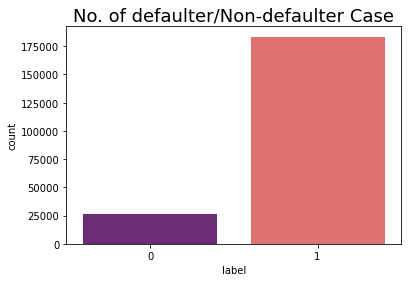

1    183431
0     26162
Name: label, dtype: int64


In [14]:
#Checking the number of Fraud cases beacuse my dataset is inbalance
sns.countplot(x='label', data=df, palette='magma')
plt.title('No. of defaulter/Non-defaulter Case',fontsize=18)
plt.show()

print(df['label'].value_counts())

##### Observation:
      1.Number of users that didn't paid back the credit amount within 5 days is around 1/8 th of the total people who took loan.

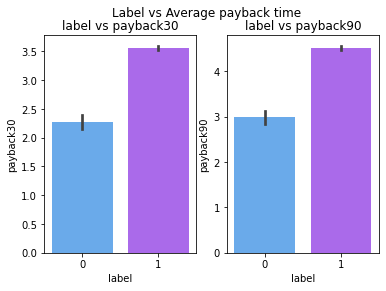

In [15]:
#Plotting label with average payback time to understand the relationship
fig,axes = plt.subplots(nrows=1,ncols=2)
fig.suptitle('Label vs Average payback time')
col = ["payback30", "payback90"]
for i in range(0,len(col)):
    axes[i] = sns.barplot(x="label",y=col[i],data=df, ax=axes[i],palette='cool')
    axes[i].set_title("label vs "+col[i])

##### Observation:
      1.Average loan payback time is 3-4 days.

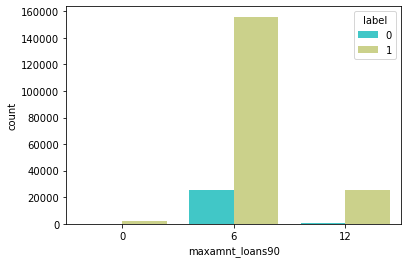

6     180945
12     26605
0       2043
Name: maxamnt_loans90, dtype: int64


In [16]:
#Plotting maximum amount of loan taken by user in 90 days
sns.countplot(hue='label',x='maxamnt_loans90', data=df, palette='rainbow')
plt.show()

print(df['maxamnt_loans90'].value_counts())

##### Observation:
      1.Maximum amount of loan taken by each user in 90 days is 5 Rs for which they had to pay 6 Rs.

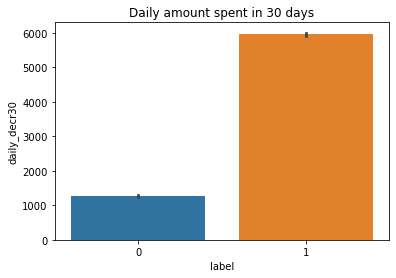

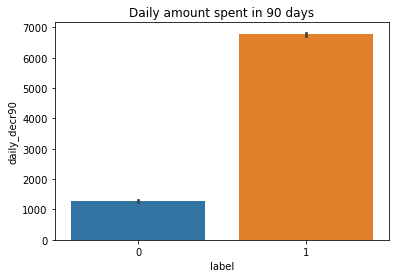

In [17]:
#Plotting label with daily amount spent from main account 
sns.barplot(y="daily_decr30",x="label",data=df)
plt.title('Daily amount spent in 30 days')
plt.show()
sns.barplot(y="daily_decr90",x="label",data=df)
plt.title('Daily amount spent in 90 days')
plt.show()

##### Observation:
      1.Non defaulters spent 6 times higher daily amount from main account within 30 days. 
      2.Non defaulters spent 7 times higher daily amount from main account within 90 days.

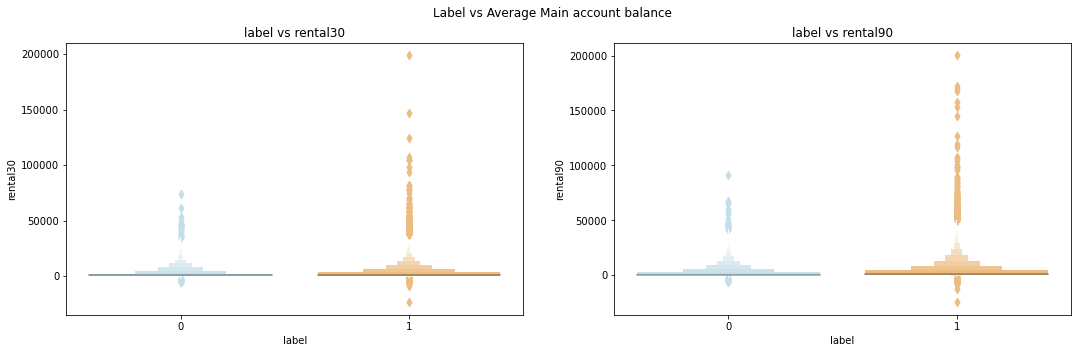

In [18]:
#Plotting label with average main account balance to understand the relationship
fig,axes = plt.subplots(nrows=1,ncols=2,figsize=(18,5))
fig.suptitle('Label vs Average Main account balance')
col = ["rental30", "rental90"]
for i in range(0,len(col)):
    axes[i] = sns.boxenplot(x="label",y=col[i],data=df, ax=axes[i],palette='RdYlBu_r')
    axes[i].set_title("label vs "+col[i])

##### Observation:
      1.Average main account balance is high for non defaulters.

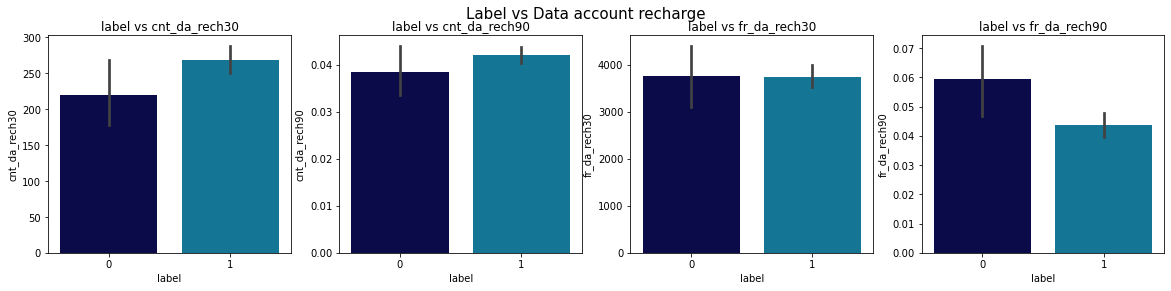

In [19]:
#Plotting label with Data account recharge to understand the relationship
fig,axes = plt.subplots(nrows=1,ncols=4,figsize=(20,4))
fig.suptitle('Label vs Data account recharge ',fontsize=15)
col = ["cnt_da_rech30","cnt_da_rech90","fr_da_rech30","fr_da_rech90"]
for i in range(0,len(col)):
    axes[i] = sns.barplot(x="label",y=col[i],data=df, ax=axes[i],palette='ocean')
    axes[i].set_title("label vs "+col[i])

##### Observation:
      1.Non defaulters recharged the data account more than defaulters in both last 30 days and in last 90 days. 
      2.Frequency of data account recharged is almost same in defaulters and non defaulters in last 30 days whereas reduced 
      in 90 days.
      3.More Outliers are present in defaulters than non defaulters.

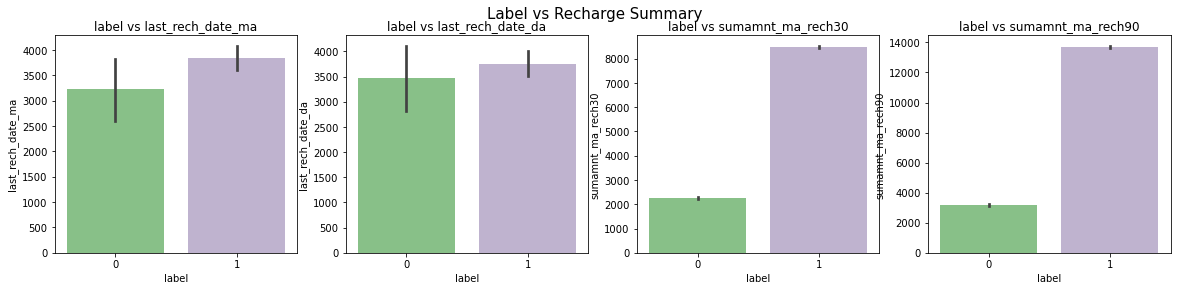

In [20]:
#Plotting label with Recharge Summary to understand the relationship
fig,axes = plt.subplots(nrows=1,ncols=4,figsize=(20,4))
fig.suptitle('Label vs Recharge Summary',fontsize=15)
col = ["last_rech_date_ma","last_rech_date_da","sumamnt_ma_rech30","sumamnt_ma_rech90"]
for i in range(0,len(col)):
    axes[i] = sns.barplot(x="label",y=col[i],data=df, ax=axes[i],palette='Accent')
    axes[i].set_title("label vs "+col[i])

##### Observation:
      1.Number of days till last recharge of main account & data account is higher for non defaulters. 
      2.Total amount of recharge in main account in last 30 & 90 days is higher for non defaulters.

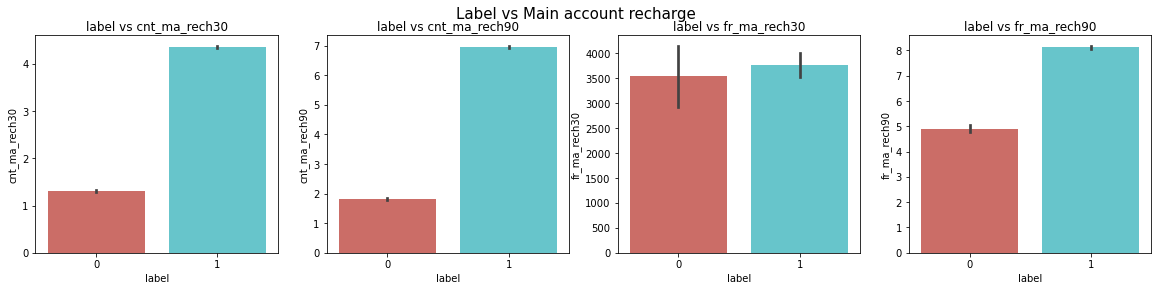

In [21]:
#Plotting label with Main account recharge to understand the relationship
fig,axes = plt.subplots(nrows=1,ncols=4,figsize=(20,4))
fig.suptitle('Label vs Main account recharge',fontsize=15)
col = ["cnt_ma_rech30","cnt_ma_rech90","fr_ma_rech30","fr_ma_rech90"]
for i in range(0,len(col)):
    axes[i] = sns.barplot(x="label",y=col[i],data=df, ax=axes[i],palette='hls')
    axes[i].set_title("label vs "+col[i])

##### Observation:
      1.Number of times main account got recharged is higher for non defaulters in last 30 & 90 days. 
      2.Frequency of main account recharged is slightly higher for non defaulter in last 30 & 90 days and significant amount of outliers are present.

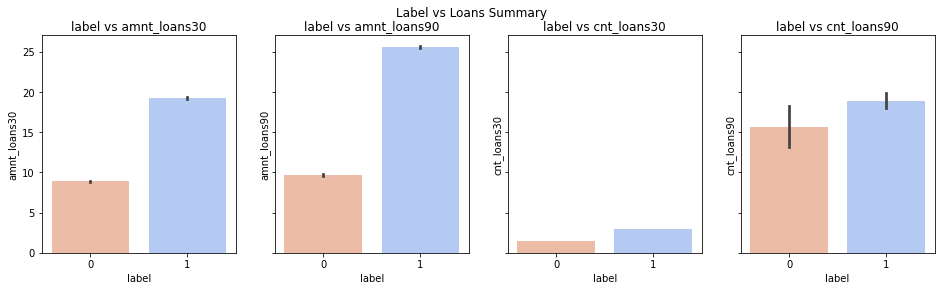

In [22]:
#Plotting label with loans summary to understand the relationship
fig,axes = plt.subplots(nrows=1,ncols=4,figsize=(16,4),sharey=True)
fig.suptitle('Label vs Loans Summary ')
col = ["amnt_loans30","amnt_loans90","cnt_loans30","cnt_loans90"]
for i in range(0,len(col)):
    axes[i] = sns.barplot(x="label",y=col[i],data=df, ax=axes[i],palette='coolwarm_r')
    axes[i].set_title("label vs "+col[i])

##### Observation:
      1.Total amount of loans taken by user in last 30 & 90 days is higher for non defaulter. 
      2.Number of loans taken by user in last 30 & 90 days is higher for non defaulters. 
      3.Outliers are present in Number of loans taken by user in last 90 days.

Text(0.5, 1.0, '90 days')

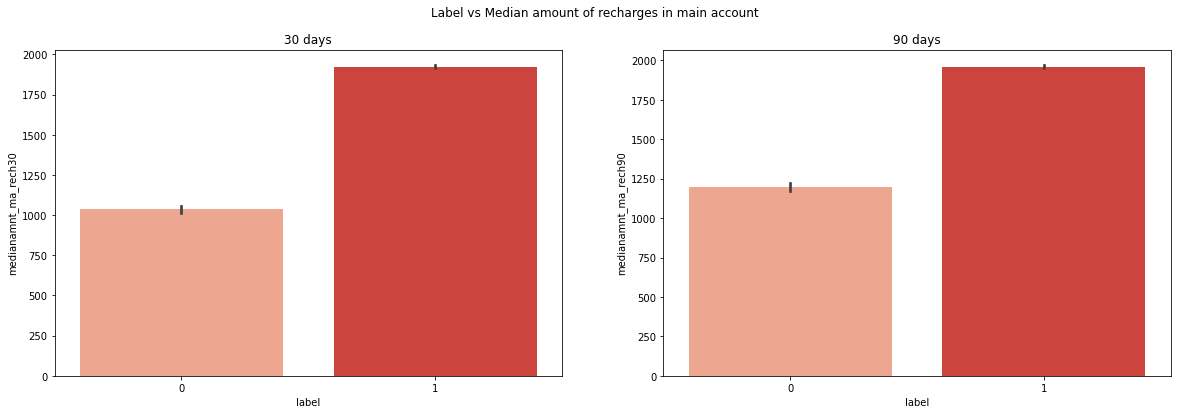

In [23]:
fig, [ax1,ax2 ] = plt.subplots(nrows=1,ncols=2,figsize=(20,6))
fig.suptitle("Label vs Median amount of recharges in main account")
ax1=sns.barplot(x='label', y='medianamnt_ma_rech30', data=df, palette="Reds",ax=ax1)
ax1.set_title("30 days")
ax2=sns.barplot(x='label', y='medianamnt_ma_rech90', data=df, palette="Reds",ax=ax2)
ax2.set_title("90 days")

##### Observation:
      1.Median of main account balance just before recharge in last 90 is higher for non defaulters.

#### EDA Concluding Remark:
     1.There are no null values in the dataset. 
     2.The dataset is imbalanced. Label ‘1’- non defaulters has approximately 86% records, while, label ‘0’- defaulters has approximately 14% records. 
     3.msisdn and aon features has some values which might not be realistic.So dropping the row which contain not realistic value. 
     4.There are some duplicate entries present in our dataset. 
     5.The collected data is only for one Telecom circle area i.e."UPW".

In [25]:
df[df==np.inf]=np.nan
df.fillna(df.mean(), inplace=True)

In [26]:
#Dropping less important featues for further process
df.drop(['last_rech_date_da','last_rech_date_ma','cnt_da_rech30','fr_da_rech30','cnt_da_rech90','fr_da_rech90',
         'maxamnt_loans30','medianmarechprebal90' ],axis='columns', inplace=True)

In [27]:
#Dropping the columns which is highly correlated with each other to avoid multicolinearity problem.
df.drop(columns=['aon','daily_decr30','daily_decr90','rental30'],axis=1, inplace = True)

### Outliers Analysis

In [29]:
#Creating a copy of dataset
df1=df.copy()

In [30]:
from scipy.stats import zscore
z = np.abs(zscore(df))
z

array([[2.64789583, 0.55858346, 0.22163706, ..., 0.22959366, 2.9046997 ,
        2.39409346],
       [0.37765836, 0.03602034, 1.570178  , ..., 0.22959366, 0.38562959,
        0.41923266],
       [0.37765836, 0.44767352, 0.22163706, ..., 0.22959366, 0.38562959,
        0.41923266],
       ...,
       [0.37765836, 0.93749981, 0.22163706, ..., 0.22959366, 0.06820893,
        0.04735622],
       [0.37765836, 0.4330386 , 0.54473742, ..., 0.22959366, 0.38562959,
        0.59938541],
       [0.37765836, 0.49427822, 2.30369175, ..., 0.22959366, 0.38562959,
        0.41923266]])

In [31]:
threshold=3
print(np.where(z>3))

(array([    21,     22,     22, ..., 209586, 209587, 209587], dtype=int64), array([ 9,  9, 20, ..., 16, 14, 18], dtype=int64))


In [32]:
df1_new=df1[(z<5).all(axis=1)]
print(df1_new.shape)

(199019, 21)


In [33]:
df=df1_new

##### Observation:
       1. Maximum row detect as outliers but we can't remove all the outliers beacuse our dataset is inbalance and if we remove all the outliers than there may be some row detected which contain information about defaulter.

### To Check the distribution of Skewness

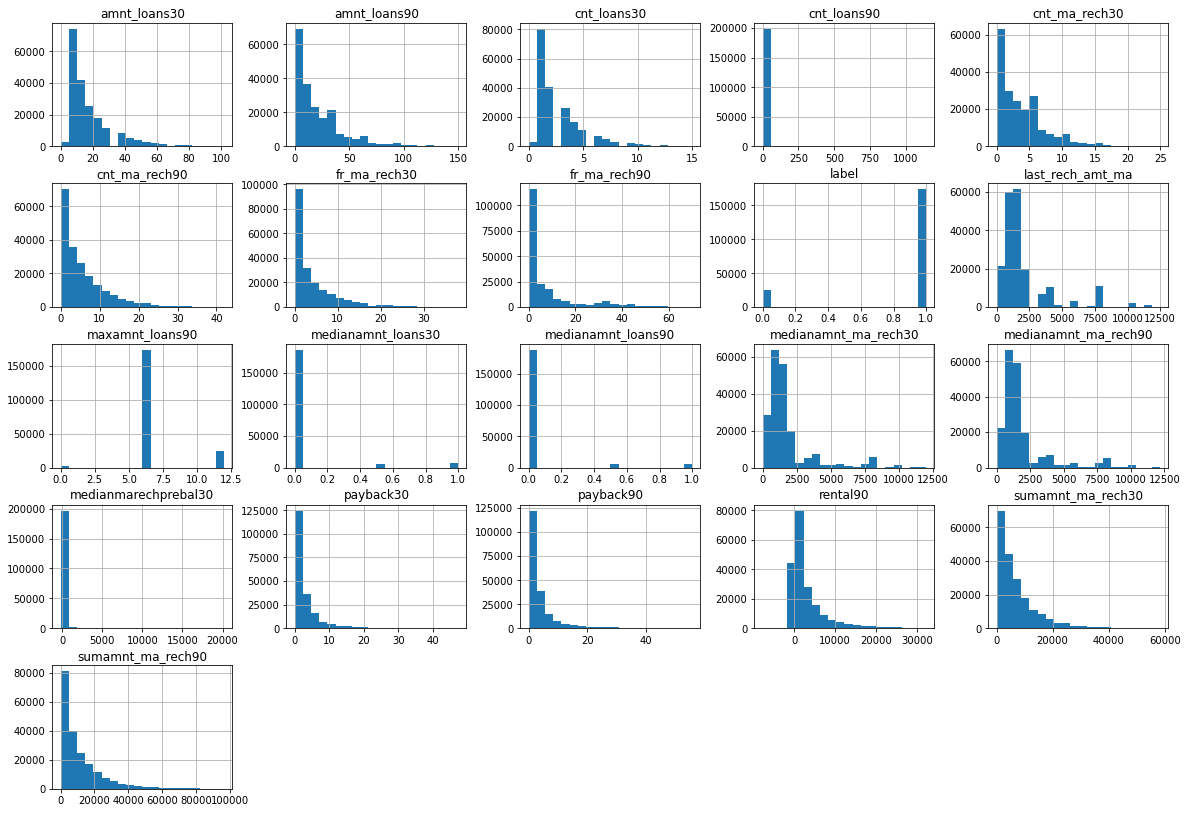

In [34]:
df.hist(figsize=(20,20),layout=(7,5),bins=20)
plt.show()

In [35]:
df.skew()

label                   -2.244215
rental90                 2.620191
last_rech_amt_ma         2.202326
cnt_ma_rech30            1.654853
fr_ma_rech30             2.005335
sumamnt_ma_rech30        2.114450
medianamnt_ma_rech30     2.423241
medianmarechprebal30    17.405662
cnt_ma_rech90            1.800774
fr_ma_rech90             2.177555
sumamnt_ma_rech90        2.217812
medianamnt_ma_rech90     2.438871
cnt_loans30              1.872081
amnt_loans30             1.888439
medianamnt_loans30       4.067420
cnt_loans90             71.000484
amnt_loans90             2.120051
maxamnt_loans90          1.741884
medianamnt_loans90       4.444902
payback30                3.665650
payback90                3.405046
dtype: float64

In [36]:
df_new = df

In [37]:
#Treating skewness in the dataset
cols = df.columns
for i in range(0,len(cols)):
    if cols[i] != "label":
        if df[cols[i]].skew()>0.55:
            df[cols[i]]=np.sqrt(df[cols[i]])

In [38]:
df.head()

,label,rental90,last_rech_amt_ma,cnt_ma_rech30,fr_ma_rech30,sumamnt_ma_rech30,medianamnt_ma_rech30,medianmarechprebal30,cnt_ma_rech90,fr_ma_rech90,...,medianamnt_ma_rech90,cnt_loans30,amnt_loans30,medianamnt_loans30,cnt_loans90,amnt_loans90,maxamnt_loans90,medianamnt_loans90,payback30,payback90
0,0,16.128546,39.230090,1.414214,4.582576,55.479726,39.230090,2.738613,1.414214,4.582576,...,39.230090,1.414214,3.464102,0.0,1.414214,3.464102,2.449490,0.0,5.385165,5.385165
1,1,60.755740,76.072334,1.000000,0.000000,76.072334,76.072334,7.812810,1.000000,0.000000,...,76.072334,1.000000,3.464102,0.0,1.000000,3.464102,3.464102,0.0,0.000000,0.000000
2,1,30.002167,39.230090,1.000000,0.000000,39.230090,39.230090,8.143709,1.000000,0.000000,...,39.230090,1.000000,2.449490,0.0,1.000000,2.449490,2.449490,0.0,0.000000,0.000000
3,1,12.626163,30.773365,0.000000,0.000000,0.000000,0.000000,0.000000,1.000000,0.000000,...,30.773365,1.414214,3.464102,0.0,1.414214,3.464102,2.449490,0.0,0.000000,0.000000
4,1,33.149661,48.052055,2.645751,1.414214,141.523850,48.052055,5.385165,2.828427,1.414214,...,53.740115,2.645751,6.480741,0.0,2.645751,6.480741,2.449490,0.0,1.527525,1.527525


In [39]:
df.skew()

label                  -2.244215
rental90                1.115406
last_rech_amt_ma        0.644919
cnt_ma_rech30           0.105301
fr_ma_rech30            0.607648
sumamnt_ma_rech30       0.406610
medianamnt_ma_rech30    0.503503
medianmarechprebal30    2.673225
cnt_ma_rech90           0.323105
fr_ma_rech90            1.002114
sumamnt_ma_rech90       0.576217
medianamnt_ma_rech90    0.619984
cnt_loans30             0.823356
amnt_loans30            0.834784
medianamnt_loans30      3.681033
cnt_loans90             7.782299
amnt_loans90            1.058056
maxamnt_loans90        -0.957077
medianamnt_loans90      4.031385
payback30               1.096219
payback90               1.028839
dtype: float64

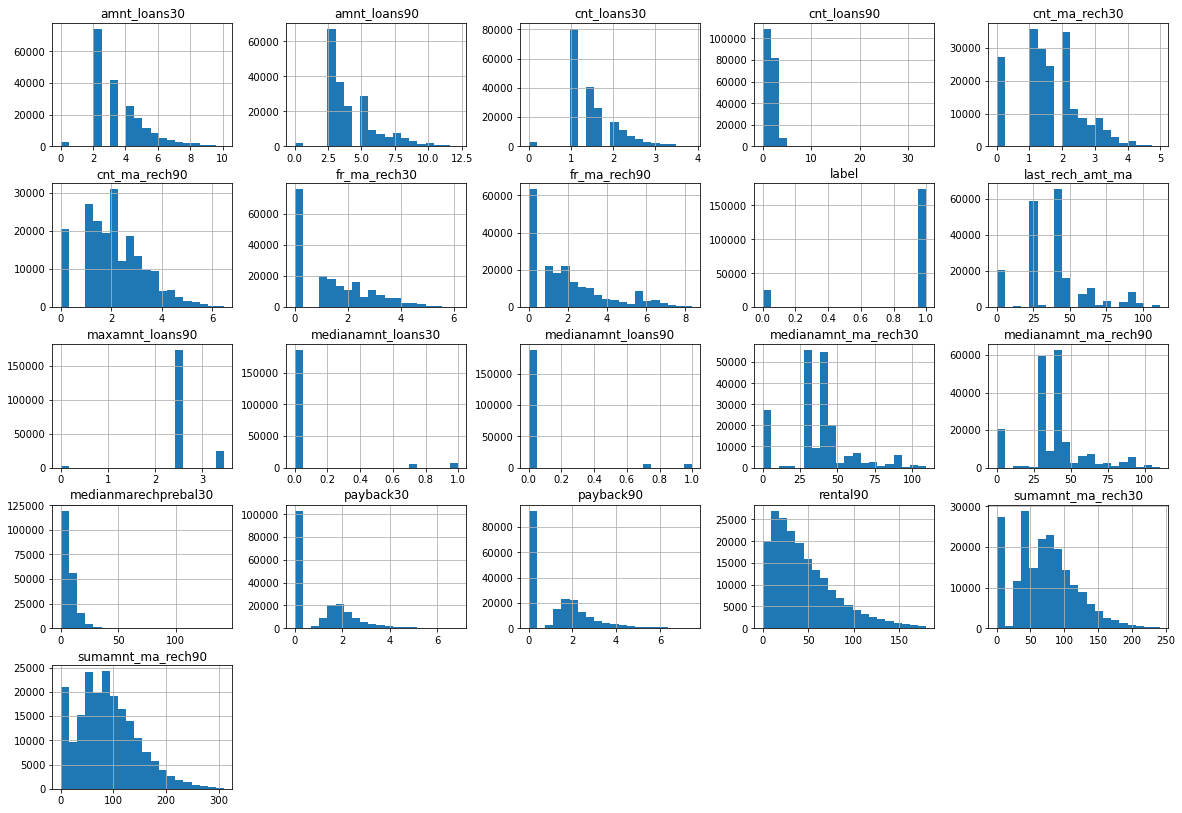

In [40]:
df.hist(figsize=(20,20),layout=(7,5),bins=20)
plt.show()

##### Observation:
         After treating skewness via sqrt method most of the features are normally distributed.

In [41]:
df.isnull().sum()

label                      0
rental90                5603
last_rech_amt_ma           0
cnt_ma_rech30              0
fr_ma_rech30               0
sumamnt_ma_rech30          0
medianamnt_ma_rech30       0
medianmarechprebal30    1549
cnt_ma_rech90              0
fr_ma_rech90               0
sumamnt_ma_rech90          0
medianamnt_ma_rech90       0
cnt_loans30                0
amnt_loans30               0
medianamnt_loans30         0
cnt_loans90                0
amnt_loans90               0
maxamnt_loans90            0
medianamnt_loans90         0
payback30                  0
payback90                  0
dtype: int64

In [42]:
cols=["rental90","medianmarechprebal30"]
for i in cols:
    df[i].fillna(df[i].mean(), inplace=True)

#### Model Building

In [25]:
#Splitting the data into x and y variables
x = df.drop(['label'], axis=1)
y = df['label']

In [26]:
#Scaling the input variable
from sklearn.preprocessing import StandardScaler
sc=StandardScaler()
x=sc.fit_transform(x)
X=x

In [27]:
#Breaking our input and target variable into train and test data
from sklearn.model_selection import train_test_split
X_train,X_test,y_train,y_test=train_test_split(X,y,test_size=0.30,random_state=42)

In [28]:
#Checking shape of train dataset
print(X_train.shape)

(139313, 20)


In [29]:
from sklearn.metrics import classification_report,accuracy_score,roc_auc_score,confusion_matrix
from sklearn.model_selection import GridSearchCV,cross_val_score

In [44]:
LR=LogisticRegression()
GNB=GaussianNB()
KNN=KNeighborsClassifier()
DTC=DecisionTreeClassifier()
RFC=RandomForestClassifier()
ADB=AdaBoostClassifier()

 ********************* LogisticRegression ************************* 


Accuracy Score : 0.8779854620976116
Cross Val Score : 0.8768358802818886
roc_auc_score = 0.5445578715512163
Confusion Matrix :
 [[  741  6825]
 [  460 51680]]


classification_report :
               precision    recall  f1-score   support

           0       0.62      0.10      0.17      7566
           1       0.88      0.99      0.93     52140

    accuracy                           0.88     59706
   macro avg       0.75      0.54      0.55     59706
weighted avg       0.85      0.88      0.84     59706





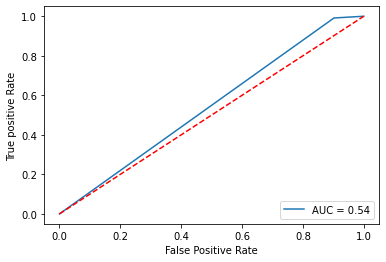




 ********************* GaussianNB ************************* 


Accuracy Score : 0.745067497403946
Cross Val Score : 0.7460744976718104
roc_auc_score = 0.7552829842305243
Confusion Matrix :
 [[ 5818  1748]
 [13473 38667]]


classification_report :
               precision    recall  f1-score   support

           0       0.30      0.77      0.43      7566
           1       0.96      0.74      0.84     52140

    accuracy                           0.75     59706
   macro avg       0.63      0.76      0.63     59706
weighted avg       0.87      0.75      0.78     59706





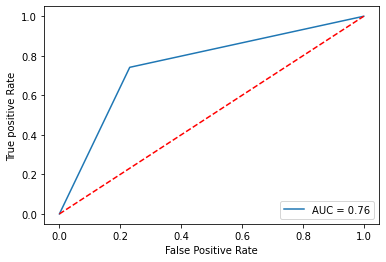




 ********************* KNeighborsClassifier ************************* 


Accuracy Score : 0.8780524570394935
Cross Val Score : 0.8804787514545716
roc_auc_score = 0.6248199123509055
Confusion Matrix :
 [[ 2161  5405]
 [ 1876 50264]]


classification_report :
               precision    recall  f1-score   support

           0       0.54      0.29      0.37      7566
           1       0.90      0.96      0.93     52140

    accuracy                           0.88     59706
   macro avg       0.72      0.62      0.65     59706
weighted avg       0.86      0.88      0.86     59706





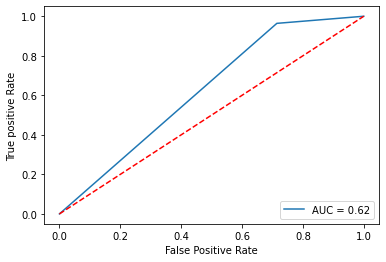




 ********************* DecisionTreeClassifier ************************* 


Accuracy Score : 0.8431648410545004
Cross Val Score : 0.8429144957870379
roc_auc_score = 0.6819047768969471
Confusion Matrix :
 [[ 3525  4041]
 [ 5323 46817]]


classification_report :
               precision    recall  f1-score   support

           0       0.40      0.47      0.43      7566
           1       0.92      0.90      0.91     52140

    accuracy                           0.84     59706
   macro avg       0.66      0.68      0.67     59706
weighted avg       0.85      0.84      0.85     59706





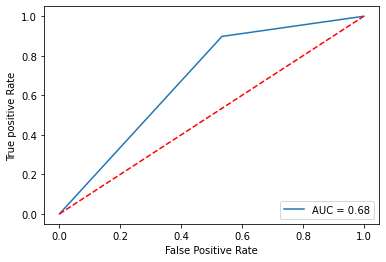




 ********************* RandomForestClassifier ************************* 


Accuracy Score : 0.8846682075503299
Cross Val Score : 0.8838754104089259
roc_auc_score = 0.6761205495969949
Confusion Matrix :
 [[ 3002  4564]
 [ 2322 49818]]


classification_report :
               precision    recall  f1-score   support

           0       0.56      0.40      0.47      7566
           1       0.92      0.96      0.94     52140

    accuracy                           0.88     59706
   macro avg       0.74      0.68      0.70     59706
weighted avg       0.87      0.88      0.88     59706





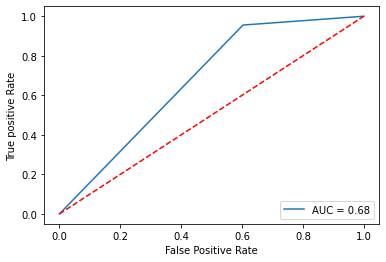




 ********************* AdaBoostClassifier ************************* 


Accuracy Score : 0.8846179613439186
Cross Val Score : 0.8817650379278635
roc_auc_score = 0.5966025405278961
Confusion Matrix :
 [[ 1595  5971]
 [  918 51222]]


classification_report :
               precision    recall  f1-score   support

           0       0.63      0.21      0.32      7566
           1       0.90      0.98      0.94     52140

    accuracy                           0.88     59706
   macro avg       0.77      0.60      0.63     59706
weighted avg       0.86      0.88      0.86     59706





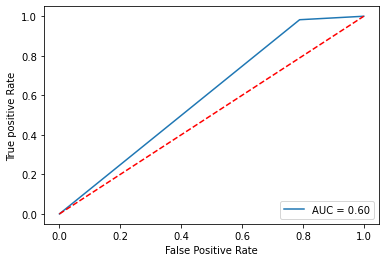

In [47]:
models=[]
models.append(('LogisticRegression',LR))
models.append(('GaussianNB',GNB))
models.append(('KNeighborsClassifier',KNN))
models.append(('DecisionTreeClassifier',DTC))
models.append(('RandomForestClassifier',RFC))
models.append(('AdaBoostClassifier',ADB))

Model=[]
score=[]
CVS=[]
ROC_Score=[]

X_train,X_test,y_train,y_test = train_test_split(X,y,random_state = 42,test_size = 0.3,stratify = y)
for name,model in models:
    print('\033[1m','*********************',name,'*************************','\033[0m')
    print('\n')
    Model.append(name)
    model.fit(X_train,y_train)
    pred=model.predict(X_test)
    
    #Accuracy Score
    AS=accuracy_score(y_test,pred)
    print('Accuracy Score :' ,AS)
    score.append(AS*100)
    
    #Cross val score
    cross_val=cross_val_score(model,x,y,cv=5,scoring='accuracy').mean()
    print('Cross Val Score :',cross_val)
    CVS.append(cross_val*100)
    
    #ROC_AUC Score
    fpr, tpr, threshold = roc_curve(y_test, pred)
    roc_auc = auc(fpr, tpr)
    print('roc_auc_score =',roc_auc)
    ROC_Score.append(roc_auc*100)
    
    #Confusion matrix
    cm=confusion_matrix(y_test,pred)
    print('Confusion Matrix :\n',cm)
    print('\n')
    
    #Classification Report
    print('classification_report :\n',classification_report(y_test,pred))
    print('\n')
    
    #ROC Curve
    plt.plot(fpr,tpr,label='AUC = %0.2f'% roc_auc)
    plt.plot([0,1],[0,1],'r--')
    plt.legend(loc='lower right')
    plt.ylabel('True positive Rate')
    plt.xlabel('False Positive Rate')
    plt.show()
    print('\n\n')

In [48]:
#Storing the results in a dataframe
result=pd.DataFrame({'Model':Model,'Accuracy_Score':score,'Cross_Val_score':CVS,'ROC_AUC_score':ROC_Score})
result_sort=result.sort_values(by='Accuracy_Score', ascending=False)
result_sort

,Model,Accuracy_Score,Cross_Val_score,ROC_AUC_score
4,RandomForestClassifier,88.466821,88.387541,67.612055
5,AdaBoostClassifier,88.461796,88.176504,59.660254
2,KNeighborsClassifier,87.805246,88.047875,62.481991
0,LogisticRegression,87.798546,87.683588,54.455787
3,DecisionTreeClassifier,84.316484,84.291450,68.190478
1,GaussianNB,74.506750,74.607450,75.528298


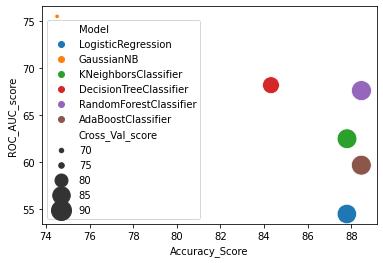

In [68]:
sns.scatterplot(data=result,x="Accuracy_Score",y="ROC_AUC_score",hue="Model",size='Cross_Val_score',sizes=(20,400),cmap="Reds")


##### Observations:
      a. From initial model accuracy values we see that RandomForest is performing better than others.
      b. It has maximum accuracy score and minimum standard deviations.
      c. GaussianNB is the worst performer with 74% accuracy.

### I Choose Random Forest Classifier as my final model.

#### Using GridSearchCV to find out best parameter.

In [51]:
# Estimating best n_estimator using grid search for Randomforest Classifier
parameters={"n_estimators":[10,100]}
rfc=RandomForestClassifier()
clf = GridSearchCV(rfc, parameters, cv=5)
clf.fit(X,y)
clf.best_params_

{'n_estimators': 100}

In [85]:
#Again running RFC with n_estimator = 100
#random state ~ 42
rfc=RandomForestClassifier(n_estimators=100)
rfc.fit(X_train,y_train)
rfc.score(X_train,y_train)
predrfc=rfc.predict(X_test)
print(accuracy_score(y_test,predrfc))
print(confusion_matrix(y_test,predrfc))
print(classification_report(y_test,predrfc))

0.8841992429571567
[[ 2984  4582]
 [ 2332 49808]]
              precision    recall  f1-score   support

           0       0.56      0.39      0.46      7566
           1       0.92      0.96      0.94     52140

    accuracy                           0.88     59706
   macro avg       0.74      0.67      0.70     59706
weighted avg       0.87      0.88      0.88     59706



### AUC_ROC Curve

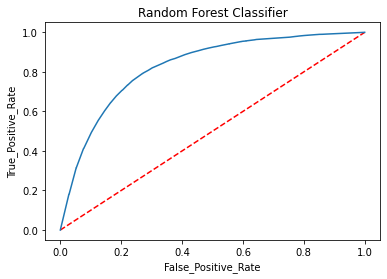

AUC_Score : 0.8274477552403953


In [93]:
#plotting the graph for area under curve for representing accuracy of data
from sklearn.metrics import roc_curve
from sklearn.metrics import roc_auc_score

pred_rfc=rfc.predict_proba(X_test)[:,1]
Fpr,Tpr,thresholds = roc_curve(y_test,pred_rfc,pos_label=True)
plt.plot([0,1],[0,1],'r--')
plt.plot(Fpr,Tpr,label='Random Forest Classifier')
plt.xlabel('False_Positive_Rate')
plt.ylabel('True_Positive_Rate')
plt.title("Random Forest Classifier")
plt.show()
auc_score=roc_auc_score(y_test,pred_rfc)
print('AUC_Score :',auc_score)

## Conclusion:

a. Taken output variable as 'label'(it has 0 - defaulter and 1- non defaulter)

b. Found best model as RandomForestClassifier which provides max accuracy score of 0.88.

c. Fine tuning done on the model and found best estimators (n_estimator=100) for the prediction.

d. Plotted AOC/ROC line that shows close match between test and predicted values.

e. Overall model fit is good.


### Saving the Model

In [94]:
import joblib
#save the model as a pickle in a file 
joblib.dump(rfc,'rfc_MicroCredit.pkl')

['rfc_MicroCredit.pkl']